### Model Training Assessment
Given that our data is wholly unlabeled, this notebook aims to examine the stability of the top performing clustering models found in the AutoML notebook: Kmeans and Spectral Clustering. <br><br>

These models will be evaluated 20 times with random initial states to ensure the stability of the findings. <br><br>

Each model will be run 20 times with the previously identified most stable hyperparameters, and the stability of their clusters evaluated. 

#### Set up your environment
Use the mlgeo enviroment from class

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import time

!pip install pycaret
import pycaret
from pycaret.clustering import *
from pycaret.clustering import ClusteringExperiment

In [2]:
#load in statistical data
#read in spectras file to dataframe
filepath = os.getcwd() + '/data/ai_ready/'
filename = 'statistics.csv'
df = pd.read_csv(filepath+filename)
df.head()

,mean,max,min,median,range,std,spec_mean,spec_max,spec_min,spec_median,spec_range,spec_std
0,0.004287,0.890882,-1.0,0.004514,1.890882,0.097879,0.004337,0.153382,7.070107e-07,0.000710,0.153382,0.010231
1,0.004287,0.890882,-1.0,0.004514,1.890882,0.097879,0.003954,0.150999,1.275567e-06,0.000715,0.150998,0.008960
2,0.004287,0.890882,-1.0,0.004514,1.890882,0.097879,0.003816,0.177869,2.608655e-06,0.000687,0.177866,0.008829
3,0.004287,0.890882,-1.0,0.004514,1.890882,0.097879,0.004417,0.323616,6.022107e-07,0.000681,0.323615,0.012174
4,0.004287,0.890882,-1.0,0.004514,1.890882,0.097879,0.003979,0.139368,5.308308e-07,0.000616,0.139368,0.009023


In [33]:
#Ideal K Values
kmeans_k = 7
sc_k = 3

In [5]:
#initialize pycaret clustering *without* setting the session_id (random seed)
s = setup(df)
exp = ClusteringExperiment()
exp.setup(df)

,Description,Value
0,Session id,8072
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4412
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


### Evaluating Stability
Run through 20 iterations of each model, saving the cluster assignments for each point

#### Kmeans Model

In [111]:
#actually run models
iterations = 100
assigns = np.zeros([iterations, len(df)])
times = []

for i in range(iterations):
    #initialize pycaret clustering *without* setting the session_id (random seed)
    s = setup(df)
    exp = ClusteringExperiment()
    exp.setup(df)

    t1 = time.time()
    kmeans = create_model('kmeans', num_clusters=kmeans_k)
    kmeans = assign_model(kmeans)
    t2 = time.time()

    temp = np.array([val.split(' ')[1] for val in kmeans.Cluster.values])
    assigns[i] = temp
    times.append(t2-t1)
    
times = np.array(times)

,Description,Value
0,Session id,4647
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8526
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3975,1598.2809,0.8565,0,0,0


,Description,Value
0,Session id,7894
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3396
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3998,1596.7269,0.8695,0,0,0


,Description,Value
0,Session id,5739
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6684
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3975,1598.2809,0.8565,0,0,0


,Description,Value
0,Session id,5371
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8167
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3662,1505.9599,0.9299,0,0,0


,Description,Value
0,Session id,8946
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8142
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4012,1596.1031,0.8650,0,0,0


,Description,Value
0,Session id,4519
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,993
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3461,1457.5371,0.9975,0,0,0


,Description,Value
0,Session id,1409
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3683
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3563,1427.6047,1.1020,0,0,0


,Description,Value
0,Session id,3085
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3188
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3989,1600.5817,0.8707,0,0,0


,Description,Value
0,Session id,407
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6732
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4012,1596.1031,0.8650,0,0,0


,Description,Value
0,Session id,7311
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3737
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3951,1599.2022,0.8640,0,0,0


,Description,Value
0,Session id,713
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,231
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3661,1506.0197,0.9308,0,0,0


,Description,Value
0,Session id,5809
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7390
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3669,1505.0812,0.9321,0,0,0


,Description,Value
0,Session id,5175
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,911
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3569,1437.1932,0.9437,0,0,0


,Description,Value
0,Session id,5716
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2275
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3998,1596.7269,0.8695,0,0,0


,Description,Value
0,Session id,7784
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3359
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4012,1596.1031,0.8650,0,0,0


,Description,Value
0,Session id,6853
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3181
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3968,1597.5874,0.8609,0,0,0


,Description,Value
0,Session id,8665
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5046
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3959,1603.3001,0.8578,0,0,0


,Description,Value
0,Session id,7478
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5457
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3963,1598.1866,0.8613,0,0,0


,Description,Value
0,Session id,6051
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3318
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4012,1596.1031,0.8650,0,0,0


,Description,Value
0,Session id,6550
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1123
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4010,1596.0902,0.8662,0,0,0


,Description,Value
0,Session id,7047
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6563
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3975,1598.2809,0.8565,0,0,0


,Description,Value
0,Session id,7876
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5729
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3250,1460.0501,1.1236,0,0,0


,Description,Value
0,Session id,6489
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6644
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3967,1598.3207,0.8589,0,0,0


,Description,Value
0,Session id,3428
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7489
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3964,1598.8097,0.8604,0,0,0


,Description,Value
0,Session id,4610
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5985
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3997,1597.0312,0.8534,0,0,0


,Description,Value
0,Session id,1994
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7441
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3695,1503.2449,0.9285,0,0,0


,Description,Value
0,Session id,2135
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7495
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3954,1603.2281,0.8605,0,0,0


,Description,Value
0,Session id,6913
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5523
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3669,1502.8566,0.9898,0,0,0


,Description,Value
0,Session id,7537
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6141
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3976,1598.2882,0.8587,0,0,0


,Description,Value
0,Session id,1383
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7133
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3967,1597.5452,0.8620,0,0,0


,Description,Value
0,Session id,4187
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7502
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3992,1596.7701,0.8716,0,0,0


,Description,Value
0,Session id,8692
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2689
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3949,1599.4144,0.8650,0,0,0


,Description,Value
0,Session id,6558
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2686
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4004,1596.0672,0.8660,0,0,0


,Description,Value
0,Session id,1385
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4299
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3683,1504.2342,0.9312,0,0,0


,Description,Value
0,Session id,934
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6533
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3669,1502.8566,0.9898,0,0,0


,Description,Value
0,Session id,6963
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7437
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3094,1352.5494,1.0992,0,0,0


,Description,Value
0,Session id,7437
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6805
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3385,1465.3260,1.0509,0,0,0


,Description,Value
0,Session id,2339
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8674
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3966,1598.3343,0.8608,0,0,0


,Description,Value
0,Session id,667
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7564
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3977,1598.3619,0.8568,0,0,0


,Description,Value
0,Session id,1049
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4194
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3686,1504.3395,0.9286,0,0,0


,Description,Value
0,Session id,7241
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,206
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3324,1454.0553,1.0880,0,0,0


,Description,Value
0,Session id,4163
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7029
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3949,1599.4246,0.8652,0,0,0


,Description,Value
0,Session id,8443
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3864
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3661,1506.0197,0.9308,0,0,0


,Description,Value
0,Session id,4281
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4495
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3954,1603.2351,0.8602,0,0,0


,Description,Value
0,Session id,1259
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6955
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3669,1502.8566,0.9898,0,0,0


,Description,Value
0,Session id,7719
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1381
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3673,1503.3342,0.9879,0,0,0


,Description,Value
0,Session id,3719
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3648
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3972,1598.3439,0.8571,0,0,0


,Description,Value
0,Session id,3919
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3827
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3949,1599.4167,0.8646,0,0,0


,Description,Value
0,Session id,4592
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7914
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3676,1507.1528,0.9297,0,0,0


,Description,Value
0,Session id,8803
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4432
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3669,1502.8566,0.9898,0,0,0


,Description,Value
0,Session id,702
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4186
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3954,1603.2281,0.8605,0,0,0


,Description,Value
0,Session id,2468
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4670
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3953,1603.3265,0.8624,0,0,0


,Description,Value
0,Session id,2554
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,885
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3661,1506.0197,0.9308,0,0,0


,Description,Value
0,Session id,1548
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8831
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3683,1504.3477,0.9288,0,0,0


,Description,Value
0,Session id,2921
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,967
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3956,1600.7306,0.8753,0,0,0


,Description,Value
0,Session id,6047
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7897
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3973,1598.3215,0.8571,0,0,0


,Description,Value
0,Session id,5297
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7334
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3975,1598.2809,0.8565,0,0,0


,Description,Value
0,Session id,2780
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3078
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3669,1502.8566,0.9898,0,0,0


,Description,Value
0,Session id,3128
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5653
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3665,1507.6886,0.9325,0,0,0


,Description,Value
0,Session id,3398
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3713
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3676,1507.1528,0.9297,0,0,0


,Description,Value
0,Session id,1512
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5118
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3685,1505.2414,0.9874,0,0,0


,Description,Value
0,Session id,2069
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7357
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3669,1502.8658,0.9891,0,0,0


,Description,Value
0,Session id,2244
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3470
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3966,1599.1437,0.8559,0,0,0


,Description,Value
0,Session id,2993
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1236
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3661,1506.0197,0.9308,0,0,0


,Description,Value
0,Session id,6855
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4168
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3959,1603.2994,0.8576,0,0,0


,Description,Value
0,Session id,8970
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6438
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3969,1598.3185,0.8582,0,0,0


,Description,Value
0,Session id,1339
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2129
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3949,1603.2518,0.8642,0,0,0


,Description,Value
0,Session id,2323
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,325
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3995,1595.8867,0.8716,0,0,0


,Description,Value
0,Session id,2127
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7169
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4007,1596.3813,0.8606,0,0,0


,Description,Value
0,Session id,8991
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,794
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3971,1597.5941,0.8606,0,0,0


,Description,Value
0,Session id,4675
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7006
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3461,1457.5355,0.9974,0,0,0


,Description,Value
0,Session id,206
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1900
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3669,1502.8566,0.9898,0,0,0


,Description,Value
0,Session id,4686
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5733
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3835,1413.6675,1.0264,0,0,0


,Description,Value
0,Session id,2316
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4599
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4006,1596.6912,0.8586,0,0,0


,Description,Value
0,Session id,5602
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1153
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3955,1599.4161,0.8631,0,0,0


,Description,Value
0,Session id,568
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5755
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3944,1471.9357,0.9308,0,0,0


,Description,Value
0,Session id,1686
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6778
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3474,1457.7798,0.9774,0,0,0


,Description,Value
0,Session id,3774
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1011
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3951,1603.2845,0.8630,0,0,0


,Description,Value
0,Session id,5803
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3797
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3949,1599.1972,0.8643,0,0,0


,Description,Value
0,Session id,3469
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8121
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3967,1598.3207,0.8589,0,0,0


,Description,Value
0,Session id,6469
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1239
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3892,1471.8287,0.9340,0,0,0


,Description,Value
0,Session id,4509
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1578
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3690,1503.2289,0.9292,0,0,0


,Description,Value
0,Session id,8857
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1546
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3377,1465.5775,1.0539,0,0,0


,Description,Value
0,Session id,6944
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,693
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3998,1596.7269,0.8695,0,0,0


,Description,Value
0,Session id,1760
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,428
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3967,1598.3207,0.8589,0,0,0


,Description,Value
0,Session id,5687
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1293
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3949,1599.4246,0.8652,0,0,0


,Description,Value
0,Session id,3959
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,260
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3948,1599.1867,0.8645,0,0,0


,Description,Value
0,Session id,4070
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5722
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3975,1598.2809,0.8565,0,0,0


,Description,Value
0,Session id,3471
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7875
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3963,1598.1866,0.8613,0,0,0


,Description,Value
0,Session id,657
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2396
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3966,1599.1437,0.8559,0,0,0


,Description,Value
0,Session id,1664
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4339
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3661,1506.0197,0.9308,0,0,0


,Description,Value
0,Session id,1097
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,194
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3669,1502.8566,0.9898,0,0,0


,Description,Value
0,Session id,327
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4397
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4012,1596.1031,0.8650,0,0,0


,Description,Value
0,Session id,4153
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4310
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3949,1599.4246,0.8652,0,0,0


,Description,Value
0,Session id,4083
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,698
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4004,1596.0845,0.8674,0,0,0


,Description,Value
0,Session id,1276
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7460
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3917,1475.0980,0.9336,0,0,0


,Description,Value
0,Session id,5130
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2429
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3972,1471.3574,0.9360,0,0,0


,Description,Value
0,Session id,4565
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4808
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3992,1596.7701,0.8716,0,0,0


,Description,Value
0,Session id,790
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1678
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3958,1603.3045,0.8584,0,0,0


,Description,Value
0,Session id,8827
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7818
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3975,1598.2809,0.8565,0,0,0


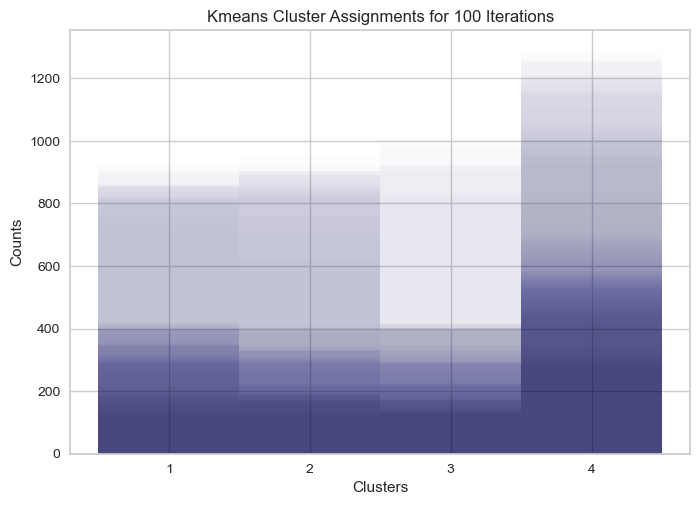

In [112]:
#view cluster assignment frequencies
fig, ax = plt.subplots()

for i in range(iterations):
    ax.hist(assigns[i], bins=[0,1,2,3,4], alpha=0.01, color='midnightblue')

ax.set_xticks([0.5,1.5,2.5,3.5] ,labels=[1,2,3,4])
ax.set_title('Kmeans Cluster Assignments for '+str(iterations)+' Iterations')
ax.set_xlabel('Clusters')
ax.set_ylabel('Counts');

In [100]:
#calculate number of changes in assignments per iteration
changes = []

for i in range(iterations-1):
    diffs = np.abs(assigns[i+1] - assigns[i])
    diffs[diffs > 0] = 1
    changes.append(np.sum(diffs))

changes = np.array(changes)

In [101]:
#View Average Percent of Points with Changed Assignments, and Average Runtime
percent = 100 * np.round(np.mean(changes/len(df)),2)
time_taken = np.round(np.mean(times), 2)

print('For Kmeans')
print('----------')
print('Average Percent of Switched Labels: '+str(percent) + '%')
print('Average Time to Compute: '+str(time_taken)+' (s)')

For Kmeans
----------
Average Percent of Switched Labels: 82.0%
Average Time to Compute: 0.17 (s)


#### For Spectral Clustering

In [102]:
#actually run models
assigns = np.zeros([iterations, len(df)])
times = []

for i in range(iterations):
    #initialize pycaret clustering *without* setting the session_id (random seed)
    s = setup(df)
    exp = ClusteringExperiment()
    exp.setup(df)

    t1 = time.time()
    sc = create_model('sc', num_clusters=sc_k)
    sc = assign_model(sc)
    t2 = time.time()

    temp = np.array([val.split(' ')[1] for val in sc.Cluster.values])
    assigns[i] = temp
    times.append(t2-t1)
    
times = np.array(times)

,Description,Value
0,Session id,4605
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4928
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4868
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3534
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,945
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,184
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,7115
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5566
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1419.7741,1.0521,0,0,0


,Description,Value
0,Session id,4363
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4197
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1419.7741,1.0521,0,0,0


,Description,Value
0,Session id,548
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6233
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6094
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2609
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,5777
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,598
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1419.7741,1.0521,0,0,0


,Description,Value
0,Session id,4845
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8460
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4891
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,238
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1419.7741,1.0521,0,0,0


,Description,Value
0,Session id,3680
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6200
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,3330
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,818
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,198
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6702
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,6465
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,625
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,6402
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1235
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,7254
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7321
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,5887
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,166
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6304
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1252
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,2692
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2619
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,7921
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5555
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1420.7980,1.0523,0,0,0


,Description,Value
0,Session id,2897
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7029
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4400
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3448
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4171
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3895
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,1269
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7628
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,3335
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4432
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,3226
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7261
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4373
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4621
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,1242
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,761
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,3987
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7512
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6846
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5486
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,2467
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7104
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6092
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5127
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,7374
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3410
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6806
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4677
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,770
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5158
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,3152
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6768
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,7899
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1922
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,7197
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5422
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,7528
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8943
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1419.7741,1.0521,0,0,0


,Description,Value
0,Session id,1228
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1396
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6645
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4527
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,1960
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5309
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4173
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3969
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,8385
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5709
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,1296
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,627
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4965
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2241
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,2439
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3901
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4150
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4512
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,1922
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4978
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4236
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4829
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6499
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3981
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,1568
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8399
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,3536
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4755
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,4623
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2557
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,875
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,253
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,7332
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7290
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,3205
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3906
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,5560
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7530
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,181
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1200
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3634,1420.3602,1.0516,0,0,0


,Description,Value
0,Session id,3839
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5650
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,2710
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6257
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1419.7741,1.0521,0,0,0


,Description,Value
0,Session id,2966
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5809
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1419.7741,1.0521,0,0,0


,Description,Value
0,Session id,2368
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1204
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,1549
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,263
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,8471
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7087
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,2895
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7645
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,1142
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8755
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,5012
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5855
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6367
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7746
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,3930
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1337
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,5823
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2186
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,7185
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4207
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4628
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6263
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6930
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,919
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,2213
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,234
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,8987
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5972
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1420.7980,1.0523,0,0,0


,Description,Value
0,Session id,5446
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8206
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,2755
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7013
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,5984
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3596
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,8719
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6486
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,7252
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3851
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4155
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,2897
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,5856
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8650
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1419.7741,1.0521,0,0,0


,Description,Value
0,Session id,1180
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6304
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6206
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6527
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1419.7741,1.0521,0,0,0


,Description,Value
0,Session id,353
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,1835
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6639
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8323
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3627,1420.8364,1.0529,0,0,0


,Description,Value
0,Session id,5002
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,4335
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3630,1420.7980,1.0523,0,0,0


,Description,Value
0,Session id,4659
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8677
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,1702
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3861
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,6521
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5570
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,5657
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,886
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,2221
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,7278
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3629,1419.9308,1.0524,0,0,0


,Description,Value
0,Session id,5904
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6973
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,7122
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,6965
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,3784
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5263
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,3479
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,320
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,4667
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,8449
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


,Description,Value
0,Session id,8176
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,3285
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3626,1419.9686,1.0530,0,0,0


,Description,Value
0,Session id,7805
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Description,Value
0,Session id,5298
1,Original data shape,"(2400, 12)"
2,Transformed data shape,"(2400, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3632,1420.6398,1.0521,0,0,0


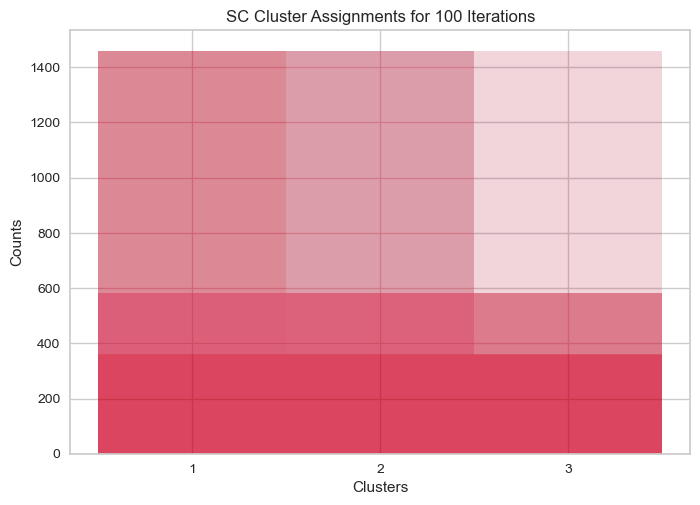

In [110]:
#view cluster assignment frequencies
fig, ax = plt.subplots()

for i in range(iterations):
    ax.hist(assigns[i], bins=[0,1,2,3], alpha=0.01, color='crimson')

ax.set_xticks([0.5,1.5,2.5] ,labels=[1,2,3])
ax.set_title('SC Cluster Assignments for '+str(iterations)+' Iterations')
ax.set_xlabel('Clusters')
ax.set_ylabel('Counts');

In [104]:
#calculate number of changes in assignments per iteration
changes = []

for i in range(iterations-1):
    diffs = np.abs(assigns[i+1] - assigns[i])
    diffs[diffs > 0] = 1
    changes.append(np.sum(diffs))

changes = np.array(changes)

In [105]:
#View Average Percent of Points with Changed Assignments, and Average Runtime
percent = 100 * np.round(np.mean(changes/len(df)),2)
time_taken = np.round(np.mean(times), 2)

print('For Spectral Clustering')
print('-----------------------')
print('Average Percent of Switched Labels: '+str(percent) + '%')
print('Average Time to Compute: '+str(time_taken)+' (s)')

For Spectral Clustering
-----------------------
Average Percent of Switched Labels: 63.0%
Average Time to Compute: 0.34 (s)


### Conclusion
Neither of these models have very stable performance, with both having a majority of their points switching labels each iteration, which does not inspire confidence in any of their assignments. Spectral Clustering takes roughly twice as long to compute compared to Kmeans clustering, but has significantly less label switching (~60% compared to ~80%). <br><br>

If our project were to be focused on classic machine learning, this performance could likely be improved using ensemble models, but given that our project emphasizes deep learning, that is the model where we will focus on improving performance.